In [4]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#preprocessing
#jan 2024 yellow taxi data 

In [6]:
df = pd.read_parquet('yellow_tripdata_2024-01.parquet')

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [8]:
#inspecting the dataframe

In [9]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [10]:
df.shape

(2964624, 19)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [12]:
#na values
#how many nas are in each column?
count_nas = df.isnull().sum()
count_nas

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64

In [13]:
# Columns w na values are passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge
# The propotion of missing data is 0.047. This is less than 5% of the total data so we can drop these rows.

In [14]:
df_cleaned = df.dropna()

In [15]:
nas= df_cleaned.isnull().sum()
nas

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

In [16]:
#data is cleaned and ready for analysis.


## Trends in Timing of Taxi Trips

In [17]:
date = pd.Timestamp(2024, 1, 1)
df = df[df['tpep_pickup_datetime'] >= date]
date = pd.Timestamp(2024, 2, 1)
df = df[df['tpep_pickup_datetime'] < date]
dates = df['tpep_pickup_datetime'].dt.floor('d').value_counts()
dates

tpep_pickup_datetime
2024-01-27    110515
2024-01-17    110365
2024-01-18    110358
2024-01-25    110318
2024-01-20    108768
2024-01-26    105804
2024-01-24    105120
2024-01-11    105010
2024-01-13    104758
2024-01-12    103655
2024-01-05    103178
2024-01-04    102901
2024-01-31    102120
2024-01-30    101233
2024-01-23     99891
2024-01-06     97117
2024-01-19     95951
2024-01-10     95000
2024-01-14     94420
2024-01-09     93962
2024-01-16     93057
2024-01-28     92837
2024-01-22     85650
2024-01-29     84547
2024-01-21     84502
2024-01-03     82427
2024-01-01     81013
2024-01-08     80034
2024-01-15     77033
2024-01-02     75519
2024-01-07     67543
Name: count, dtype: int64

<Axes: xlabel='day'>

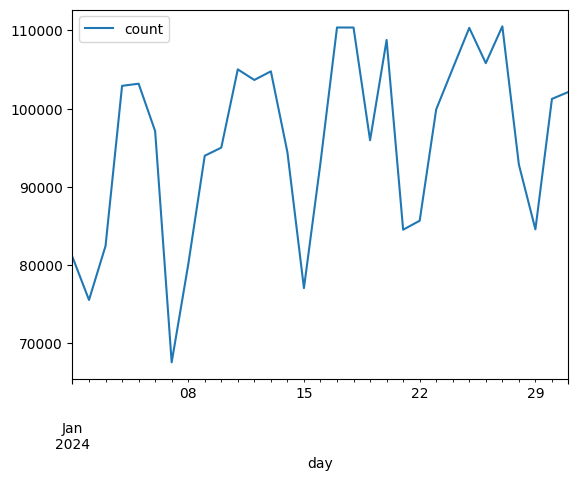

In [18]:
date_counts = dates.to_frame()
date_counts['day'] = dates.index
date_counts['weekday'] = date_counts['day'].dt.dayofweek
date_counts = date_counts.sort_values(by = 'day')
date_counts.plot(x = 'day', y = 'count')

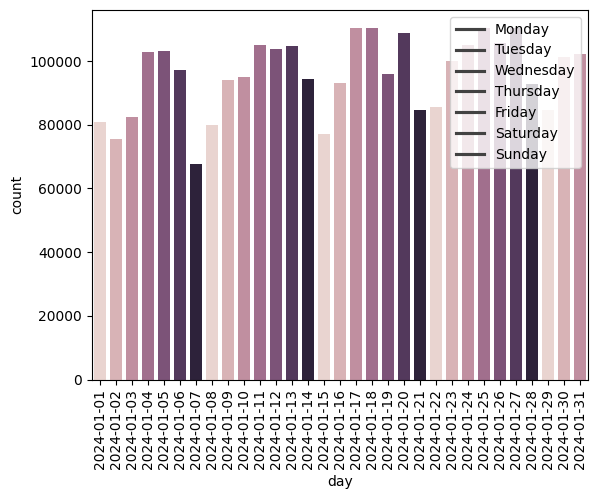

In [19]:
date_counts['weekend'] = False
date_counts.loc[date_counts['weekday'] > 4, 'weekend'] = True
plt.xticks(rotation=90)

graph = sns.barplot(x = date_counts['day'], y = date_counts['count'], hue = date_counts['weekday'])
plt.legend(labels= ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])
plt.show(graph)
#date_counts.plot(x = 'day', y = 'count', color = {'0': 'lightgreen', '1': 'limegreen', '2': 'green', '3': 'forestgreen', '4': 'darkgreen', '5': 'red', '6': 'firebrick'})

<Axes: xlabel='hour'>

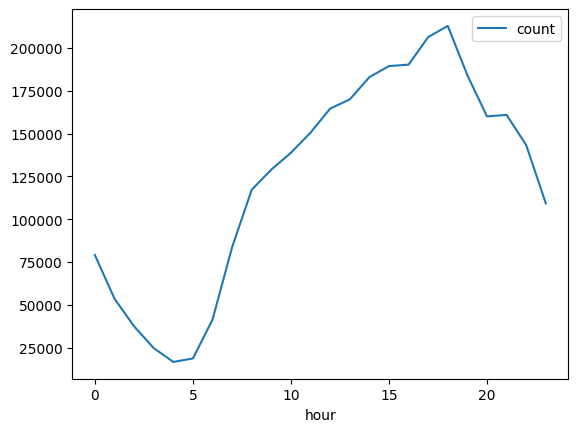

In [20]:
hours = df['tpep_pickup_datetime'].dt.hour.value_counts()
hour_counts = hours.to_frame()
hour_counts['hour'] = hours.index
hour_counts = hour_counts.sort_values(by = 'hour')
hour_counts.plot(x = 'hour', y = 'count')

## Trend in Distance of Taxi Trips

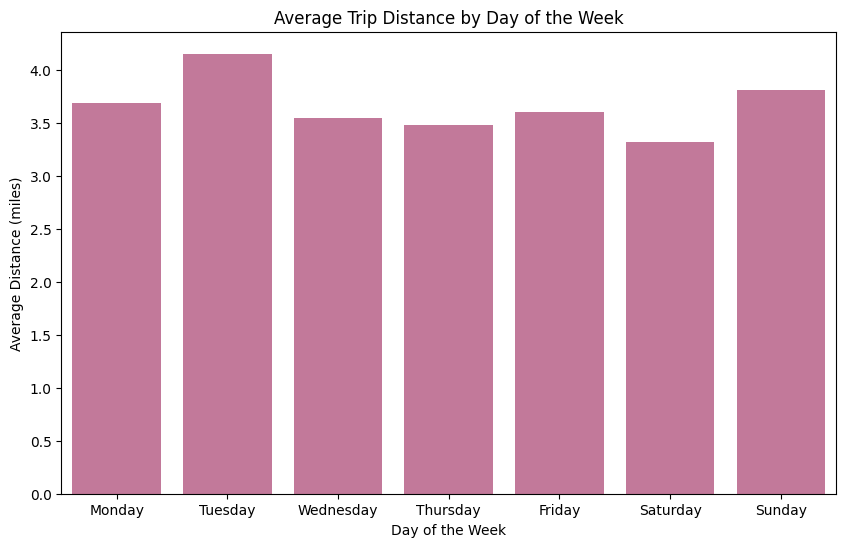

In [ ]:
date_df = df.copy()
date_df['pickup_datetime'] = pd.to_datetime(date_df['tpep_pickup_datetime'])
date_df['day_of_week'] = date_df['pickup_datetime'].dt.day_name()
distance_by_day = date_df.groupby('day_of_week')['trip_distance'].agg(['mean', 'median', 'count']).reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Bar Plot: Average trip distance by day
plt.figure(figsize=(10, 6))
sns.barplot(x=distance_by_day.index, y=distance_by_day['mean'], color= '#ba306e', alpha=0.7)
plt.title('Average Trip Distance by Day of the Week')
plt.ylabel('Average Distance (miles)')
plt.xlabel('Day of the Week')
plt.show()

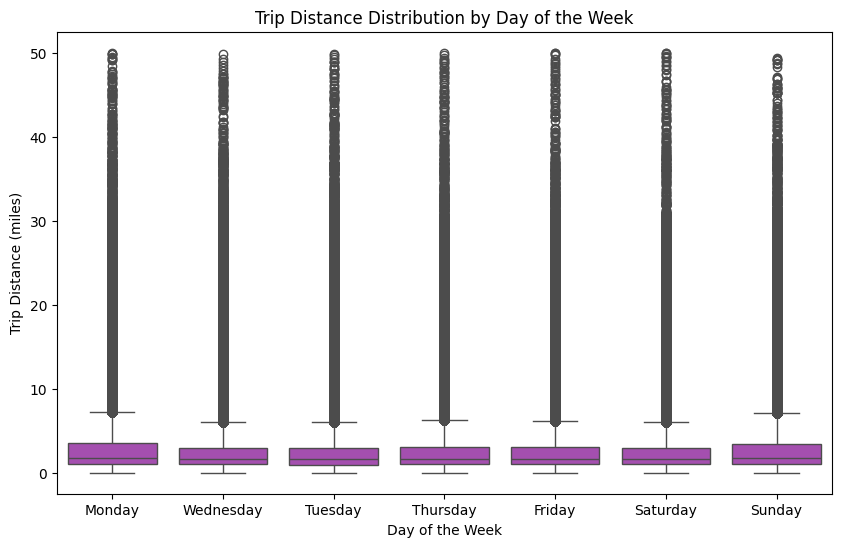

In [32]:
# Box Plot: Distribution of trip distance by day
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='trip_distance', data=df[df['trip_distance'] < 50], color = "#b03fbf")  
plt.title('Trip Distance Distribution by Day of the Week')
plt.ylabel('Trip Distance (miles)')
plt.xlabel('Day of the Week')

plt.show()